In [1]:
import cv2
import numpy as np
import os
import pandas as pd
import pytesseract
import re
import textdistance
import datetime
from datetime import date
from operator import itemgetter, attrgetter
from matplotlib import pyplot as plt

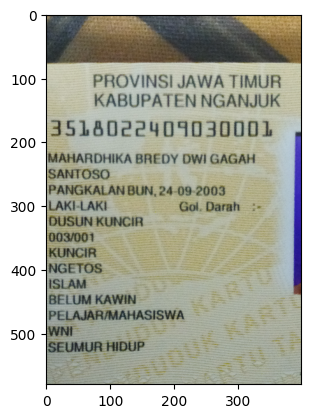

In [24]:
image = cv2.imread("image.jpg")
image = cv2.resize(image, (750, 50 * 16))

# crop the image to get the identity text only
image = image[20:600, 180:580]

img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
img_gray = cv2.equalizeHist(img_gray)
img_gray = cv2.fastNlMeansDenoising(img_gray, None, 3, 7, 21)
# cv2.fillPoly(img_gray, pts=[np.asarray([(540, 150), (540, 499), (798, 499), (798, 150)])], color=(255, 255, 255))
th, threshed = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)
result_raw = pytesseract.image_to_string(threshed, lang="ind")

plt.imshow(image)

TypeError: Image data of dtype <U10 cannot be converted to float

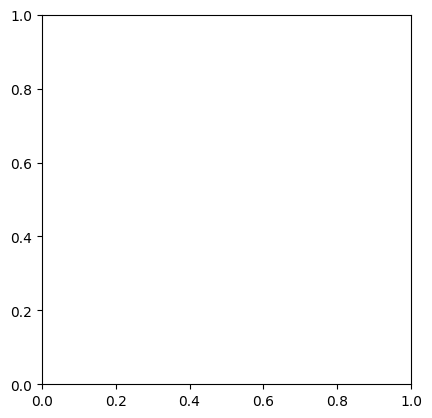

In [4]:
def crop_image():
    # Read the image and the template
    image = cv2.imread('image.jpg')
    template = cv2.imread('template.jpg')
    
    # Convert the images to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    
    # Match the template in the image
    result = cv2.matchTemplate(gray_image, gray_template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    
    # Get the coordinates of the template in the image
    top_left = max_loc
    h, w = template.shape[:2]
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    # Crop the image based on the template
    cropped_image = image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
    
    # Save the cropped image
    cv2.imwrite('output.jpg', cropped_image)
    
crop_image()
plt.imshow('output.jpg')
